In [1]:
import os

texts = {}

for writer in sorted(os.listdir('./texts')):
    textNames = sorted(os.listdir('./texts/' + writer))
    texts.update({writer: textNames})

writers = list(texts.keys())

print(writers)

['Достоевский Федор Михайлович', 'Гоголь Николай Васильевич', 'Пелевин Виктор', 'Булгаков Михаил Афанасьевич', 'Стругацкий Аркадий Натанович']


In [2]:
# Выводим список произведений по авторам
print(texts)

{'Достоевский Федор Михайлович': ['Братья Карамазовы.txt', 'Идиот.txt', 'Преступление и наказание.txt'], 'Гоголь Николай Васильевич': ['Вечера на хуторе близ Диканьки.txt', 'Вий.txt', 'Мертвые души.txt'], 'Пелевин Виктор': ['Жизнь насекомых.txt', 'Омон Ра.txt', 'П5  Прощальные песни политических пигмеев Пиндостана.txt'], 'Булгаков Михаил Афанасьевич': ['Записки юного врача.txt', 'Мастер и Маргарита.txt', 'Собачье сердце.txt'], 'Стругацкий Аркадий Натанович': ['Пикник на обочине.txt', 'Понедельник начинается в субботу.txt', 'Улитка на склоне.txt']}


In [3]:
# Функция для разбиения входных текстов на части по n символов
import itertools
def grouper(n, iterable):
    args = [iter(iterable)] * n
    #return list(map(lambda s: "".join(s), list([e for e in t if e != None] for t in itertools.zip_longest(*args))))
    return list("".join([e for e in t if e != None]) for t in itertools.zip_longest(*args))

In [4]:
# Загружаем тексты
data = []
label_list = []
for writer in writers:
    books = []
    for text in texts[writer]:
        with open('./texts/' + writer + '/' + text) as bookFile:
            book = bookFile.read().replace('\n', ' ').replace('\xa0', ' ')
            for b in grouper(100000, book):
                books.append(b)
                label_list.append(writer + '_' + text[:-4])
    data.append(books)

In [5]:
# Загрузка необходимых для работы с текстами модулей
import spacy
nlp = spacy.load('/home/lvova/Documents/python/spacy-ru/ru2')

In [6]:
from nltk.tokenize import sent_tokenize

In [7]:
# Разобьём по предложениям
sent_tokenize_list = sent_tokenize(data[0][0])

In [8]:
# Посмотрим на результат разделения по предложениям
for sent_index, sent in enumerate(sent_tokenize_list):
    print("#{}:{}".format(sent_index,sent))

#0:﻿Посвящается Анне Григорьевне Достоевской Истинно, истинно говорю вам: если пшеничное зерно, падши в землю, не умрет, то останется одно; а если умрет, то принесет много плода.
#1:(Евангелие от Иоанна, гл.
#2:XII, ст.
#3:24).
#4:От автора Начиная жизнеописание героя моего, Алексея Федоровича Карамазова, нахожусь в некотором недоумении.
#5:А именно: хотя я и называю Алексея Федоровича моим героем, но, однако, сам знаю, что человек он отнюдь не великий, а посему и предвижу неизбежные вопросы вроде таковых: чем же замечателен ваш Алексей Федорович, что вы выбрали его своим героем?
#6:Что сделал он такого?
#7:Кому и чем известен?
#8:Почему я, читатель, должен тратить время на изучение фактов его жизни?
#9:Последний вопрос самый роковой, ибо на него могу лишь ответить: «Может быть, увидите сами из романа».
#10:Ну а коль прочтут роман и не увидят, не согласятся с примечательностью моего Алексея Федоровича?
#11:Говорю так, потому что с прискорбием это предвижу.
#12:Для меня он примечателен,

In [9]:
# Напишем функцию, которая парсит по одному предложению и выводит некоторую информацию:
def parse_one_sentence(one_sentence):
    doc = nlp(one_sentence)
    for token in doc:
        print('{} \ {} \ {} \ {} \ {} \ {}'.format(
            token.text, 
            token.lemma_,
            token.pos_, 
            token.tag_, 
            token.dep_, 
            token.head.text
        ))

In [10]:
# Теперь проведем анализ для каждого из предложений
for sent_index, sent in enumerate(sent_tokenize_list[:10]):
    print("Sentence #{}\t{}".format(sent_index,sent))
    parse_one_sentence(sent)
    print('\n\n')

Sentence #0	﻿Посвящается Анне Григорьевне Достоевской Истинно, истинно говорю вам: если пшеничное зерно, падши в землю, не умрет, то останется одно; а если умрет, то принесет много плода.
﻿Посвящается \ ﻿посвящается \ VERB \ VERB__Aspect=Imp|Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Mid \ ROOT \ ﻿Посвящается
Анне \ анне \ PROPN \ PROPN__Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing \ advmod \ ﻿Посвящается
Григорьевне \ григорий \ PROPN \ PROPN__Animacy=Anim|Case=Dat|Gender=Fem|Number=Sing \ flat:name \ Анне
Достоевской \ достоевский \ PROPN \ PROPN__Animacy=Anim|Case=Ins|Gender=Fem|Number=Sing \ flat:name \ Григорьевне
Истинно \ истинно \ PROPN \ PROPN__Animacy=Anim|Case=Ins|Gender=Fem|Number=Sing \ flat:name \ Анне
, \ , \ PUNCT \ PUNCT___ \ punct \ говорю
истинно \ истинно \ ADV \ ADV__Degree=Pos \ advmod \ говорю
говорю \ говорить \ VERB \ VERB__Aspect=Imp|Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act \ conj \ ﻿Посвящается
вам \ вы \ PRON \ PRON__

Кому \ кто \ PRON \ PRON__Case=Dat \ iobj \ известен
и \ и \ CCONJ \ CCONJ___ \ cc \ чем
чем \ что \ PRON \ PRON__Case=Ins \ conj \ Кому
известен \ известный \ ADJ \ ADJ__Degree=Pos|Gender=Masc|Number=Sing|Variant=Short \ ROOT \ известен
? \ ? \ PUNCT \ PUNCT___ \ punct \ известен



Sentence #8	Почему я, читатель, должен тратить время на изучение фактов его жизни?
Почему \ почему \ ADV \ ADV__Degree=Pos \ advmod \ должен
я \ я \ PRON \ PRON__Case=Nom|Number=Sing|Person=1 \ nsubj \ должен
, \ , \ PUNCT \ PUNCT___ \ punct \ читатель
читатель \ читатель \ NOUN \ NOUN__Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing \ appos \ я
, \ , \ PUNCT \ PUNCT___ \ punct \ читатель
должен \ должный \ ADJ \ ADJ__Degree=Pos|Gender=Masc|Number=Sing|Variant=Short \ ROOT \ должен
тратить \ тратить \ VERB \ VERB__Aspect=Imp|VerbForm=Inf|Voice=Act \ xcomp \ должен
время \ время \ NOUN \ NOUN__Animacy=Inan|Case=Acc|Gender=Neut|Number=Sing \ obj \ тратить
на \ на \ ADP \ ADP___ \ case \ изучение
изучение \ изу

In [11]:
# Используем одно из предложений
sent_tokenize_list[40]

'Он был женат два раза, и у него было три сына: старший, Дмитрий Федорович, от первой супруги, а остальные два, Иван и Алексей, от второй.'

In [12]:
# Выводим семантическое дерево
doc = nlp(sent_tokenize_list[40])

from nltk import Tree

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_

to_nltk_tree(list(doc.sents)[0].root).pretty_print()

                                                        женат                                                                  
  ________________________________________________________|______                                                               
 |   |   |                                                      было                                                           
 |   |   |     __________________________________________________|____________                                                  
 |   |   |    |   |   |                                                      сына                                              
 |   |   |    |   |   |     __________________________________________________|______                                           
 |   |   |    |   |   |    |   |                                                  старший                                      
 |   |   |    |   |   |    |   |          ___________________________________________|_______________

In [13]:
# Функция для получения атрибутов, характеризующих авторский стиль (число слов в предложении, 
# число потомков корня, глубина семантического дерева)
def attr(doc):
    out = {'sentSize': len(doc)}
    for word in doc:
        if word.dep_ =='ROOT': out.update({'rootChild': len(list(word.children))})

    import json

    def depth(jsn):
        if 'modifiers' in jsn.keys():
            return 1 +  max([0] + list(map(depth, jsn['modifiers'])))
        else:
            return 1

    j = json.loads(str(doc.print_tree()[0]).replace('\'', "\""))
    out.update({'depthTree': depth(j)})
#     print(out)
    return out

In [14]:
doc

Он был женат два раза, и у него было три сына: старший, Дмитрий Федорович, от первой супруги, а остальные два, Иван и Алексей, от второй.

In [15]:
attr(doc)

{'depthTree': 6, 'rootChild': 4, 'sentSize': 33}

In [16]:
from itertools import combinations

In [17]:
# Вычисление числа встречающихся в тексте различных трилетов
# Используются топ-10 из наиболее встречаемых трилетов
def treelets(data, topN=10):
    one_gram_treelet = {}
    two_gram_treelet = {}
    three_gram_treelet = {}
    for sent in sent_tokenize(data):
        doc = nlp(sent)

        for token in doc:
            key = token.pos_
            one_gram_treelet.update({key: one_gram_treelet.get(key, 0) + 1})

            key = (token.head.pos_, token.dep_, token.pos_)
            two_gram_treelet.update({key: two_gram_treelet.get(key, 0) + 1})

            for (left_child, right_child) in combinations(token.children, 2):
                if left_child.dep_ != 'punct' and right_child.dep_ != 'punct':
                    key = (1, left_child.pos_, left_child.dep_, token.pos_, right_child.dep_, right_child.pos_)
                    three_gram_treelet.update({key: three_gram_treelet.get(key, 0) + 1})
            if token.dep_ != 'ROOT':
                for child in token.children:
                    if child.dep_ == 'punct' or token.dep_ == 'punct':
                        continue
                    key = (2, child.pos_, child.dep_, token.pos_, token.dep_, token.head.pos_)
                    three_gram_treelet.update({key: three_gram_treelet.get(key, 0) + 1})
                    
    import operator
    sorted_1gram_treelet = {}
    from collections import OrderedDict
    from operator import itemgetter
    sorted_1gram_treelet = dict((sorted(one_gram_treelet.items(), key=itemgetter(1)))[-topN:])  
    sorted_2gram_treelet = dict((sorted(two_gram_treelet.items(), key=itemgetter(1)))[-topN:])
    sorted_3gram_treelet = dict((sorted(three_gram_treelet.items(), key=itemgetter(1)))[-topN:])
    return (len(sent_tokenize(data)), sorted_1gram_treelet, sorted_2gram_treelet, sorted_3gram_treelet)

In [18]:
(numOfSents, sorted_1gram_treelet, sorted_2gram_treelet, sorted_3gram_treelet) = treelets(data[0][0])
print(numOfSents)
print(sorted_1gram_treelet)

722
{'PUNCT': 3693, 'ADJ': 1702, 'NOUN': 3058, 'DET': 591, 'VERB': 2256, 'ADP': 1706, 'PART': 1285, 'ADV': 1443, 'PRON': 1548, 'CCONJ': 1007}


In [19]:
print(sorted_2gram_treelet)
print(list(sorted_2gram_treelet.keys()))

{('VERB', 'advmod', 'ADV'): 604, ('VERB', 'conj', 'VERB'): 475, ('VERB', 'obl', 'NOUN'): 867, ('NOUN', 'case', 'ADP'): 1122, ('VERB', 'ROOT', 'VERB'): 507, ('VERB', 'punct', 'PUNCT'): 1520, ('NOUN', 'amod', 'ADJ'): 804, ('NOUN', 'punct', 'PUNCT'): 701, ('VERB', 'cc', 'CCONJ'): 437, ('NOUN', 'nmod', 'NOUN'): 429}
[('VERB', 'advmod', 'ADV'), ('VERB', 'conj', 'VERB'), ('VERB', 'obl', 'NOUN'), ('NOUN', 'case', 'ADP'), ('VERB', 'ROOT', 'VERB'), ('VERB', 'punct', 'PUNCT'), ('NOUN', 'amod', 'ADJ'), ('NOUN', 'punct', 'PUNCT'), ('VERB', 'cc', 'CCONJ'), ('NOUN', 'nmod', 'NOUN')]


In [20]:
print(sorted_3gram_treelet)

{(1, 'VERB', 'conj', 'VERB', 'conj', 'VERB'): 220, (2, 'CCONJ', 'cc', 'VERB', 'conj', 'VERB'): 282, (2, 'ADP', 'case', 'PRON', 'obl', 'VERB'): 243, (2, 'ADJ', 'amod', 'NOUN', 'obl', 'VERB'): 229, (1, 'CCONJ', 'cc', 'VERB', 'obl', 'NOUN'): 170, (1, 'ADP', 'case', 'NOUN', 'amod', 'ADJ'): 319, (2, 'ADP', 'case', 'NOUN', 'obl', 'VERB'): 652, (1, 'ADV', 'advmod', 'VERB', 'obl', 'NOUN'): 181, (2, 'NOUN', 'obl', 'VERB', 'conj', 'VERB'): 178, (1, 'NOUN', 'obl', 'VERB', 'conj', 'VERB'): 216}


In [21]:
import pickle
if 0:
    # Анализ текстов по трилетам
    trByAuth = []
    for authorTexts in data:
        trByText = []
        for text in authorTexts:
            trByText.append(treelets(text))
        trByAuth.append(trByText)
        # Сохранение полученных атрибутов для дальнейшего использования
    with open('dataTr.pickle', 'wb') as f:
        pickle.dump(trByAuth, f)

In [22]:
with open('dataTr.pickle', 'rb') as f:
    trByAuth = pickle.load(f)

In [23]:
trAuth = []
for auth in trByAuth:
    trText = []
    for text in auth:
        numOfSent = text[0]
        numOfTreelets = list(map(lambda x: x/numOfSent, list(text[1].values()) + list(text[2].values()) + list(text[3].values())))
        trText.append(numOfTreelets)
    trAuth.append(trText)

In [24]:
# K-Means кластеризация
from sklearn.cluster import KMeans
Xtr = trAuth[0] + trAuth[1] + trAuth[2] + trAuth[3] + trAuth[4]

In [25]:
# Выбор оптимального числа классов
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(Xtr)
#     data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

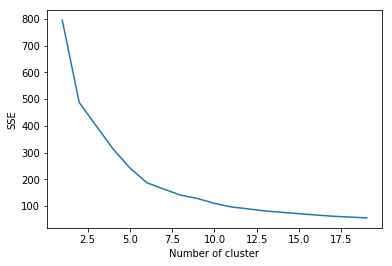

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [27]:
# Пусть будет 5, чтобы число кластеров было не меньше числа авторов (попытка разделить тексты по авторам)
kmeans = KMeans(n_clusters=5, random_state=0).fit(Xtr)

In [28]:
# Доля соответствия номера автора номеру кластера
import numpy as np
matches = []
for Nclust in range(5):
    clustMatches = []
    for Nauth in range(5):
        authMatches = 0
        for i in kmeans.predict(np.array(trAuth[Nauth])):
            if i == Nclust: authMatches += 1
        clustMatches.append(authMatches/len(trAuth[Nauth]))
    matches.append(clustMatches)

In [29]:
# дробные числа - доля соответствия номера кластера номеру автора, 
# столбец справа - номер столбца с максимальным значением 
# (соответствует номеру автора, наиболее часто попадающего в данный кластер, 
# номера строк - номера кластеров, столбцов - авторов)
for line in matches:
    for item in line:
        print("{:f}".format(item), end=' ')
    print(np.argmax(line), end='')
    print()

0.666667 0.071429 0.133333 0.636364 0.846154 4
0.000000 0.000000 0.400000 0.181818 0.000000 2
0.111111 0.928571 0.377778 0.181818 0.076923 1
0.000000 0.000000 0.022222 0.000000 0.000000 2
0.222222 0.000000 0.066667 0.000000 0.076923 0


In [30]:
# Анализ текстов по атрибутам дерева
if 0:
    attrsByAuth = []
    for authorTexts in data:
        attrsByText = []
        for text in authorTexts:
            sents = sent_tokenize(text)
            attrBySent = []
            for sent in sents:
                doc = nlp(sent)
                try:
                    attrBySent.append(attr(doc))
                except:
                    pass
            attrsByText.append(attrBySent)
        attrsByAuth.append(attrsByText)
        # Сохранение полученных атрибутов для дальнейшего использования
        with open('data.pickle', 'wb') as f:
            pickle.dump(attrsByAuth, f)

In [31]:
with open('data.pickle', 'rb') as f:
    attrsByAuth = pickle.load(f)

In [32]:
# Средние значения и СКО атрибутов по авторам (для первого текста)
import numpy as np
for i in range(5):
    depthTreeMean = np.mean([sent['depthTree'] for sent in attrsByAuth[i][0]])
    depthTreeStd = np.std([sent['depthTree'] for sent in attrsByAuth[i][0]])
    print(depthTreeMean, depthTreeStd)

4.74800796812749 2.0161810612268076
4.4601386481802425 1.8919391118533362
4.705573080967403 2.0239264040556204
4.390127388535032 1.8126496379297383
3.890808569454043 1.7163685636495871


In [33]:
# Усреднение атрибутов по всем текстам каждого из авторов
aAuth = []
for auth in attrsByAuth:
    aText = []
    for text in auth:
        x = [0,0,0]
        n = len(text)
#         print(n)
        for sent in text:
            x[0] += sent['depthTree'] / n
            x[1] += sent['rootChild'] / n
            x[2] += sent['sentSize'] / n
        aText.append(x)
    aAuth.append(aText)

In [34]:
# K-Means кластеризация
X = np.array(aAuth[0] + aAuth[1] + aAuth[2] + aAuth[3] + aAuth[4])

In [35]:
# Выбор оптимального числа классов
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(X)
#     data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

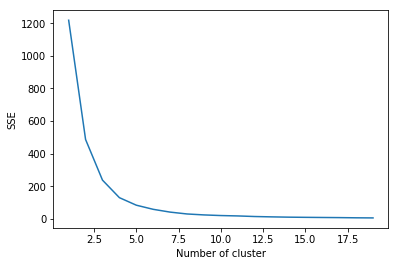

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [38]:
# Доля соответствия номера автора номеру кластера
matches = []
for Nclust in range(5):
    clustMatches = []
    for Nauth in range(5):
        authMatches = 0
        for i in kmeans.predict(np.array(aAuth[Nauth])):
            if i == Nclust: authMatches += 1
        clustMatches.append(authMatches/len(aAuth[Nauth]))
    matches.append(clustMatches)

In [39]:
for line in matches:
    for item in line:
        print("{:f}".format(item), end=' ')
    print(np.argmax(line), end='')
    print()

0.230769 0.333333 0.444444 0.285714 0.000000 2
0.000000 0.000000 0.066667 0.142857 0.000000 3
0.384615 0.333333 0.022222 0.142857 0.727273 4
0.000000 0.111111 0.200000 0.142857 0.000000 2
0.384615 0.222222 0.266667 0.285714 0.272727 0


In [40]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [41]:
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [42]:
# generate the linkage matrix
Z = linkage(Xtr, 'ward')

In [43]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(Xtr))
c

0.672306386122242

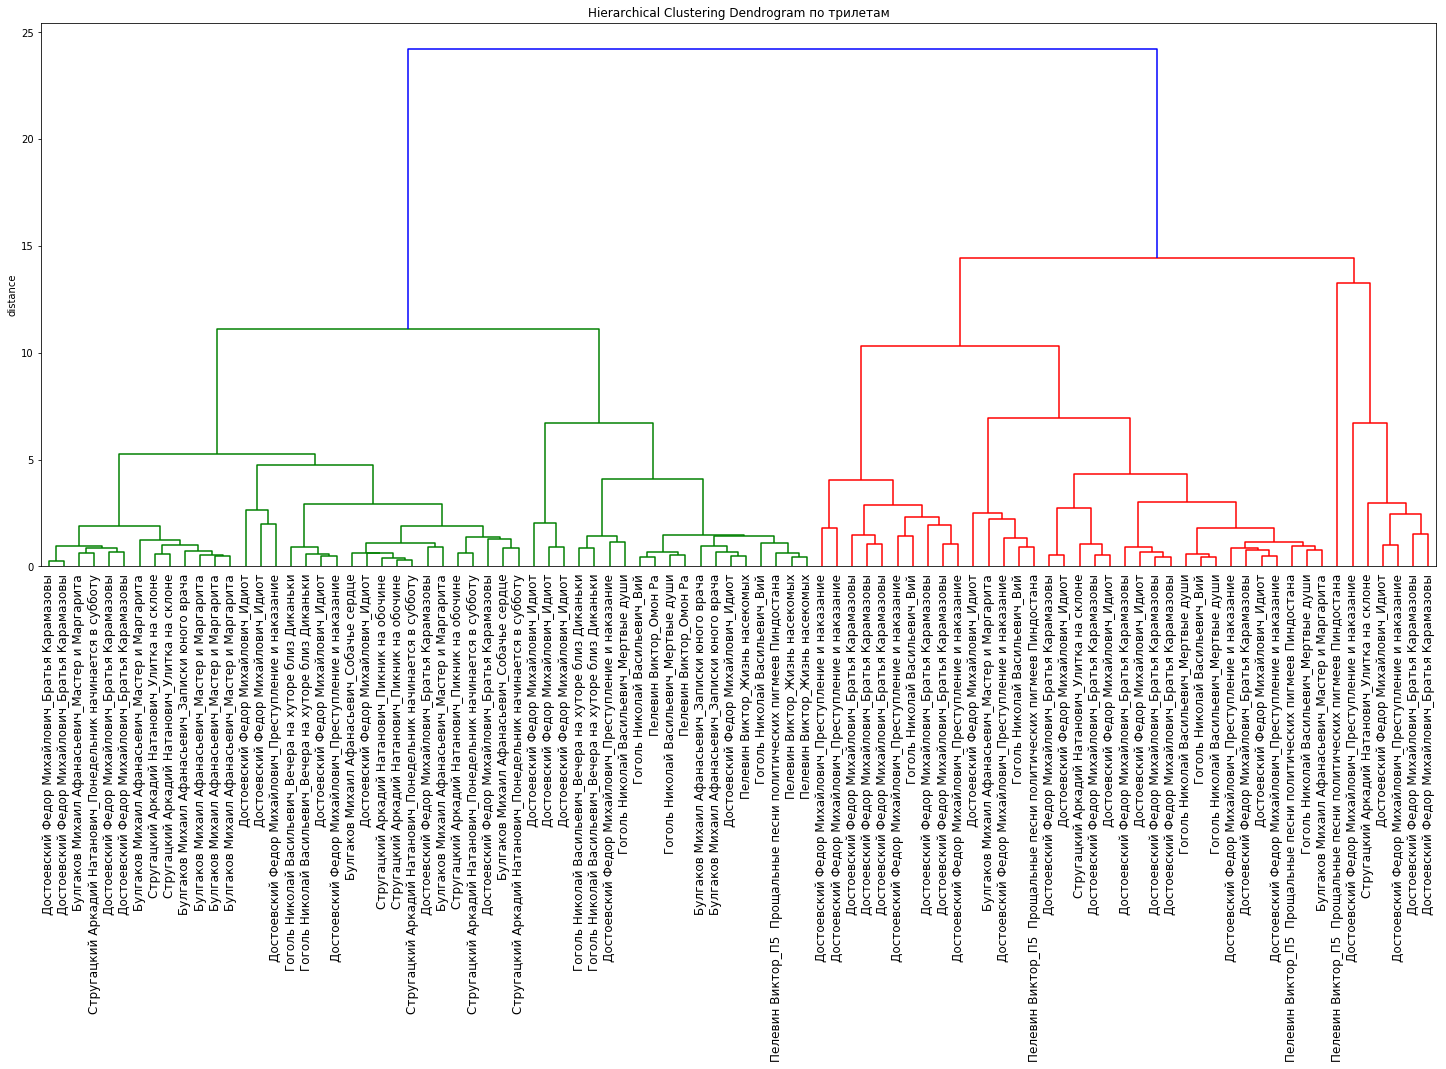

In [44]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram по трилетам')
# plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    labels=label_list,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()

In [45]:
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
c

0.6976595503770928

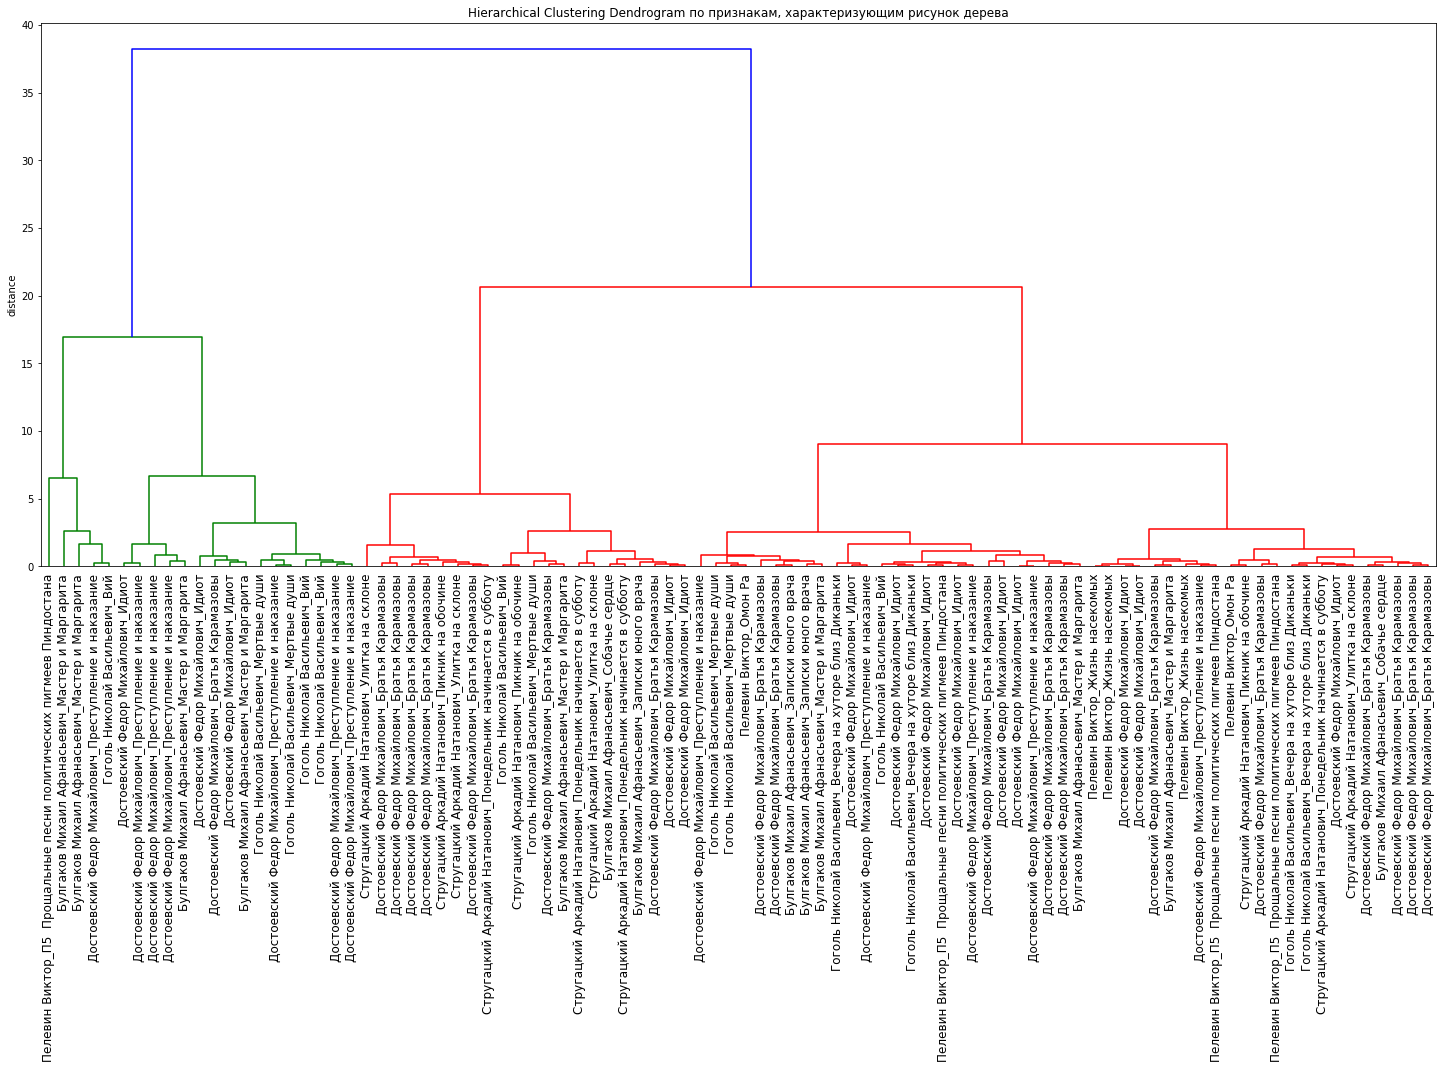

In [46]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram по признакам, характеризующим рисунок дерева')
# plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    labels=label_list,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
)
plt.show()

Вывод: чистых кластеров не наблюдается, кластеризация по авторам предложенным методом имеет довольно низкую точность